In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

In [9]:
train_data=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [11]:
train_generator=train_data.flow_from_directory(
    'E:/archive (3)/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',  
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical',
    subset='training'
)

Found 56251 images belonging to 38 classes.


In [13]:
validation_generator = train_data.flow_from_directory(
    'E:/archive (3)/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train', 
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical',
    subset='validation'
)

Found 14044 images belonging to 38 classes.


In [15]:
test_data=ImageDataGenerator(
    rescale=1./255
)

In [17]:
test_generator=test_data.flow_from_directory(
    'E:/archive (3)/test',  # Change this path
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical'
)

Found 33 images belonging to 1 classes.


In [19]:
# Display the 38 unique class names (labels) each one in seperated line 
for label,index in train_generator.class_indices.items():
    print(index," : ",label)
    

0  :  Apple___Apple_scab
1  :  Apple___Black_rot
2  :  Apple___Cedar_apple_rust
3  :  Apple___healthy
4  :  Blueberry___healthy
5  :  Cherry_(including_sour)___Powdery_mildew
6  :  Cherry_(including_sour)___healthy
7  :  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
8  :  Corn_(maize)___Common_rust_
9  :  Corn_(maize)___Northern_Leaf_Blight
10  :  Corn_(maize)___healthy
11  :  Grape___Black_rot
12  :  Grape___Esca_(Black_Measles)
13  :  Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
14  :  Grape___healthy
15  :  Orange___Haunglongbing_(Citrus_greening)
16  :  Peach___Bacterial_spot
17  :  Peach___healthy
18  :  Pepper,_bell___Bacterial_spot
19  :  Pepper,_bell___healthy
20  :  Potato___Early_blight
21  :  Potato___Late_blight
22  :  Potato___healthy
23  :  Raspberry___healthy
24  :  Soybean___healthy
25  :  Squash___Powdery_mildew
26  :  Strawberry___Leaf_scorch
27  :  Strawberry___healthy
28  :  Tomato___Bacterial_spot
29  :  Tomato___Early_blight
30  :  Tomato___Late_blight
31  :  T

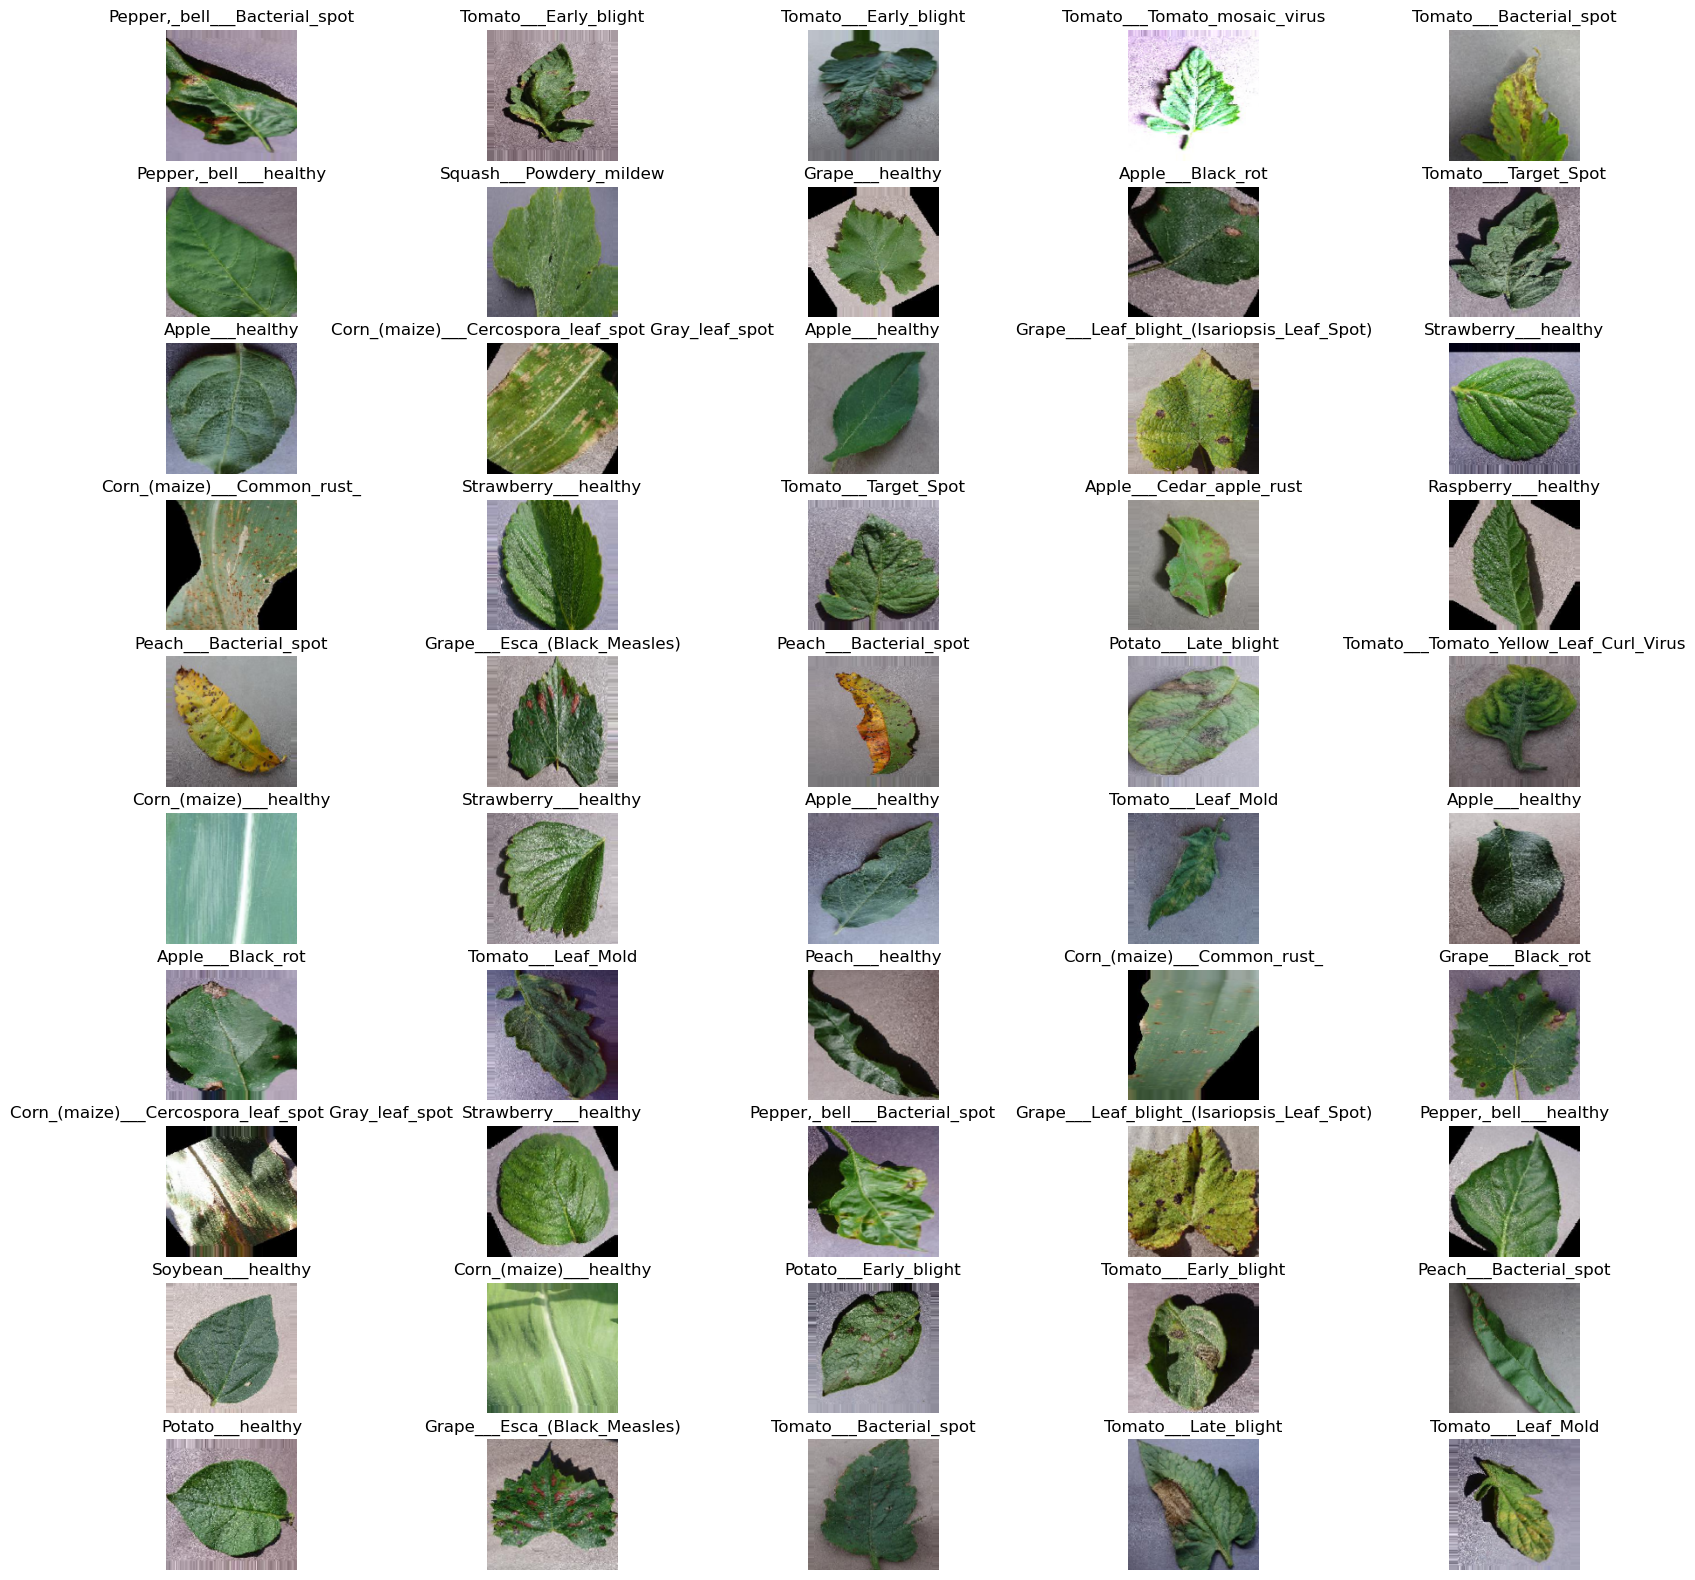

In [21]:
# Get a batch of images and labels from the train_generator
images, labels = next(train_generator)  # Get the next batch (128 images in this case)

# Reverse the class_indices dictionary to get a mapping from index to class name
class_labels = {v: k for k, v in train_generator.class_indices.items()}

# Convert one-hot encoded labels back to the index form (if using categorical mode)
label_indices = np.argmax(labels, axis=1)

# If you want to shuffle the batch and display 50 random images
random_indices = np.random.choice(len(images), 50, replace=False)  # Choose 50 random indices

# Plot 50 random images with labels
plt.figure(figsize=(20, 20))
for i, idx in enumerate(random_indices):
    plt.subplot(10, 5, i + 1)  # Create a grid of 5 rows and 10 columns
    plt.imshow(images[idx])
    plt.title(class_labels[label_indices[idx]])  # Show the label as the title
    plt.axis('off')  # Hide the axis

plt.show()

In [23]:
model=Sequential([
  # Input Layer in CNN 
  Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),



  # Feture Extraction Layers in CNN with MaxPooling 
  Conv2D(32,(3,3),activation='relu'),
  MaxPooling2D((2,2)),
  Conv2D(64,(3,3),activation='relu'),
  MaxPooling2D((2,2)),
  Conv2D(128,(3,3),activation='relu'),
  MaxPooling2D((2,2)),
  Conv2D(256,(3,3),activation='relu'),
  MaxPooling2D((2,2)),
  Conv2D(512,(3,3),activation='relu'),
  MaxPooling2D((2,2)),
  
    
# Fully Connected Neural Network
  Flatten(),
  Dense(512, activation='relu'),
  Dropout(0.5),
  Dense(38, activation='softmax')  # 38 classes
  
])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 5, 5, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          19,494 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,646,406 (10.10 MB)

 Trainable params: 2,646,406 (10.10 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [29]:
pip install pydot

  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
Note: you may need to restart the kernel to use updated packages.


In [29]:
from tensorflow.keras import metrics
model.compile(optimizer='adam',loss='categorical_crossentropy'
              ,metrics=['accuracy',metrics.Recall(),metrics.Precision()])

In [31]:
early_stopping=EarlyStopping(monitor='val_loss',patience=5)
model_checkpoint=ModelCheckpoint(
    'best_model.keras',  # File path where the model will be saved
    monitor='val_loss',  # Metric to monitor
    save_best_only=True,  # Save only the model with the best validation loss
    mode='min',  # 'min' because lower loss is better
    verbose=1  # Verbosity mode
)

In [33]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10,
    callbacks=[early_stopping,model_checkpoint],
    verbose=1
)

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1348 - loss: 3.1285 - precision: 0.6019 - recall: 0.0383
Epoch 1: val_loss improved from inf to 1.31449, saving model to best_model.keras
439/439 ━━━━━━━━━━━━━━━━━━━━ 1284s 3s/step - accuracy: 0.1352 - loss: 3.1271 - precision: 0.6022 - recall: 0.0385 - val_accuracy: 0.5993 - val_loss: 1.3145 - val_precision: 0.8355 - val_recall: 0.3675
Epoch 2/10
  1/439 ━━━━━━━━━━━━━━━━━━━━ 9:40 1s/step - accuracy: 0.5625 - loss: 1.5243 - precision: 0.7818 - recall: 0.3359

C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_loss did not improve from 1.31449
439/439 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5625 - loss: 1.5243 - precision: 0.7818 - recall: 0.3359 - val_accuracy: 0.5109 - val_loss: 1.6385 - val_precision: 0.7692 - val_recall: 0.3261
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6135 - loss: 1.2304 - precision: 0.7766 - recall: 0.4698
Epoch 3: val_loss improved from 1.31449 to 0.67339, saving model to best_model.keras
439/439 ━━━━━━━━━━━━━━━━━━━━ 686s 2s/step - accuracy: 0.6137 - loss: 1.2300 - precision: 0.7767 - recall: 0.4700 - val_accuracy: 0.7785 - val_loss: 0.6734 - val_precision: 0.8563 - val_recall: 0.7079
Epoch 4/10
  1/439 ━━━━━━━━━━━━━━━━━━━━ 8:09 1s/step - accuracy: 0.7500 - loss: 0.7300 - precision: 0.8333 - recall: 0.7031
Epoch 4: val_loss improved from 0.67339 to 0.64228, saving model to best_model.keras
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - accuracy: 0.7500 - loss: 0.7300 - precision: 0.8333 - recall: 0.7031 - val_accuracy: 0.7500 

In [35]:
# using max to use best model saved by modelcheckpoint
train_accuracy = max(history.history['accuracy'])
val_accuracy = max(history.history['val_accuracy']) 

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Training Accuracy: 0.9062
Validation Accuracy: 0.9130


In [37]:
results = model.evaluate(test_generator)
loss = results[0]
accuracy = results[1]
precision = results[2]
recall = results[3]

print(f'Testing Loss: {loss}')
print(f'Testing Accuracy: {accuracy}')
print(f'Testing Precision: {precision}')
print(f'Testing Recall: {recall}')

InvalidArgumentError: Graph execution error:

Detected at node LogicalAnd_1 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\ProgramData\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\ProgramData\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\ProgramData\anaconda3\Lib\asyncio\windows_events.py", line 322, in run_forever

  File "C:\ProgramData\anaconda3\Lib\asyncio\base_events.py", line 641, in run_forever

  File "C:\ProgramData\anaconda3\Lib\asyncio\base_events.py", line 1987, in _run_once

  File "C:\ProgramData\anaconda3\Lib\asyncio\events.py", line 88, in _run

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_2572\2534715523.py", line 1, in <module>

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 433, in evaluate

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 165, in one_step_on_iterator

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 154, in one_step_on_data

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 91, in test_step

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\trainer.py", line 452, in compute_metrics

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 330, in update_state

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 17, in update_state

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\metrics\confusion_metrics.py", line 522, in update_state

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\metrics\metrics_utils.py", line 592, in update_confusion_matrix_variables

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\metrics\metrics_utils.py", line 565, in weighted_assign_add

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\ops\numpy.py", line 3247, in logical_and

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\numpy.py", line 1420, in logical_and

Incompatible shapes: [1,1254] vs. [1,33]
	 [[{{node LogicalAnd_1}}]] [Op:__inference_one_step_on_iterator_70566]

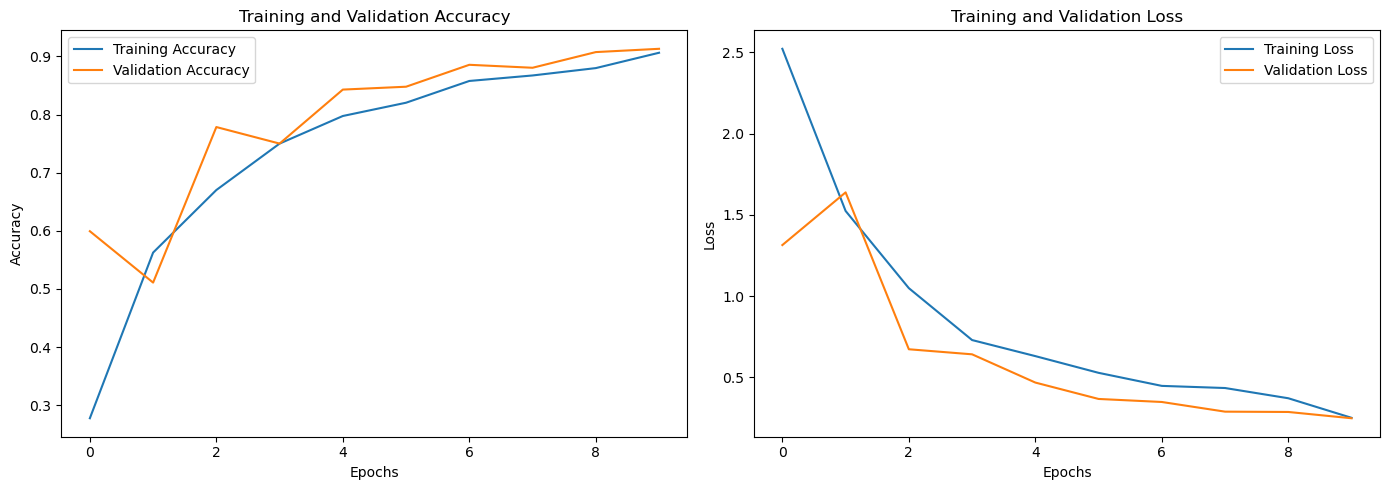

In [39]:

import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns for subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [41]:
# Get predictions on the validation set
y_probs = model.predict(validation_generator)   # probabilities for each class
y_pred = np.argmax(y_probs, axis=1)             # pick highest probability class


110/110 ━━━━━━━━━━━━━━━━━━━━ 83s 756ms/step


110/110 ━━━━━━━━━━━━━━━━━━━━ 83s 751ms/step


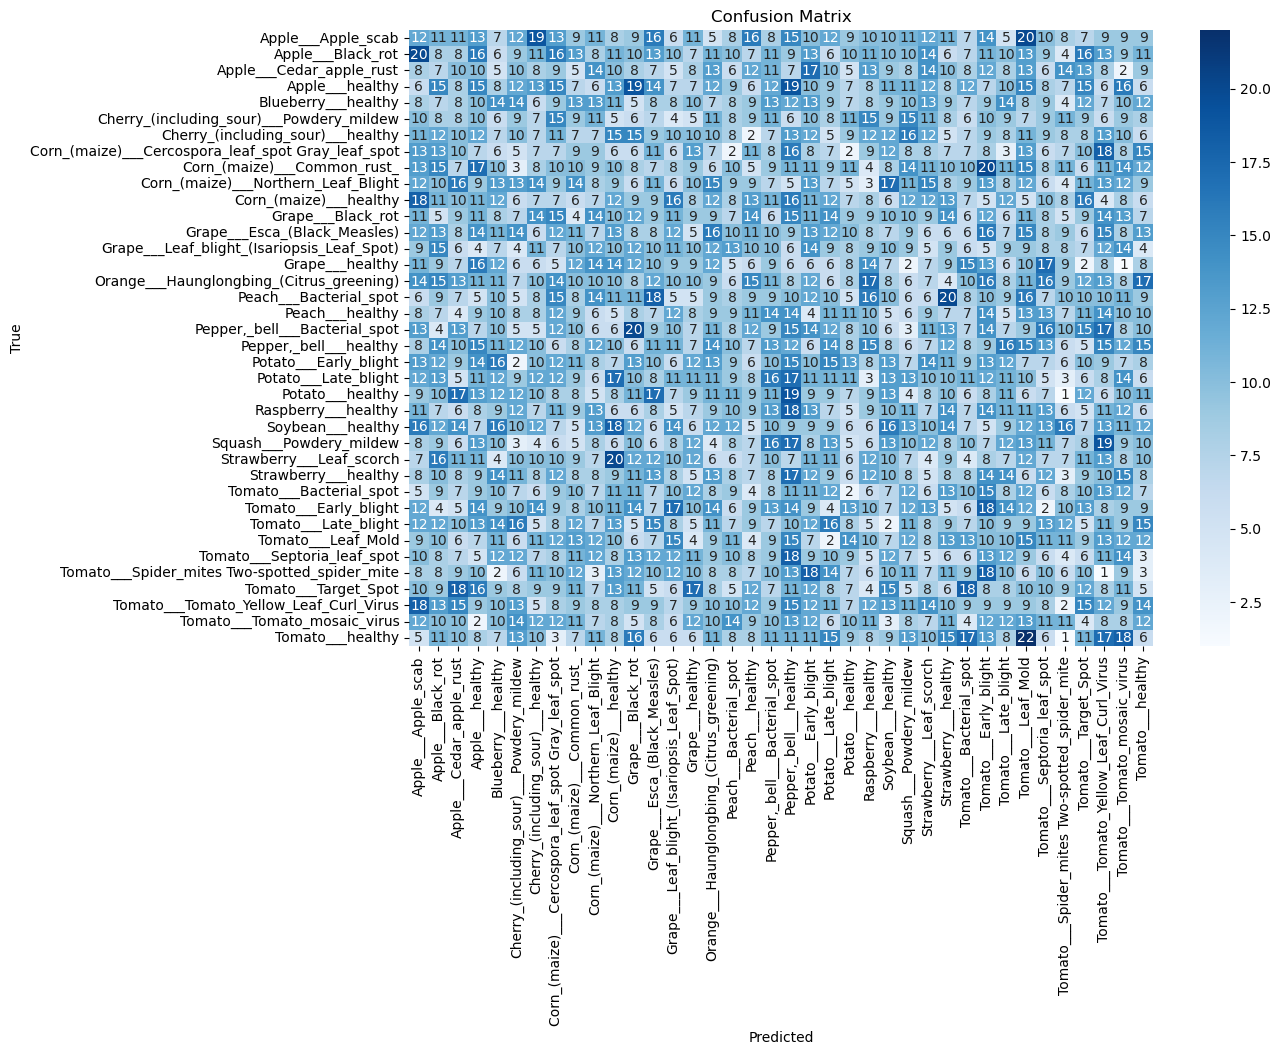

Classification Report:

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.03      0.03      0.03       403
                                 Apple___Black_rot       0.02      0.02      0.02       397
                          Apple___Cedar_apple_rust       0.03      0.03      0.03       352
                                   Apple___healthy       0.04      0.04      0.04       401
                               Blueberry___healthy       0.04      0.04      0.04       363
          Cherry_(including_sour)___Powdery_mildew       0.03      0.03      0.03       336
                 Cherry_(including_sour)___healthy       0.02      0.02      0.02       365
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.02      0.02      0.02       328
                       Corn_(maize)___Common_rust_       0.03      0.03      0.03       381
               Corn_(maize)___Northern_Leaf_Blight     

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get predictions
y_probs = model.predict(validation_generator)   # probabilities
y_pred = np.argmax(y_probs, axis=1)             # predicted labels
y_true = validation_generator.classes           # true labels

# Step 2: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
labels = list(validation_generator.class_indices.keys())

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Step 3: Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))


In [45]:
def Evaluate_model(model, train_generator, validation_generator, test_generator):
    model_evaluate_train = model.evaluate(train_generator)
    print("Loss       : ", model_evaluate_train[0])
    print("Accuracy   : ", model_evaluate_train[1])
    print("Precision  : ", model_evaluate_train[2])
    print("Recall     : ", model_evaluate_train[3])

    
    model_evaluate_valid = model.evaluate(validation_generator)
    print("Loss       : ", model_evaluate_valid[0])
    print("Accuracy   : ", model_evaluate_valid[1])
    print("Precision  : ", model_evaluate_valid[2])
    print("Recall     : ", model_evaluate_valid[3])
    

    model_evaluate_test = model.evaluate(test_generator)
    print("Loss       : ", model_evaluate_test[0])
    print("Accuracy   : ", model_evaluate_test[1])
    print("Precision  : ", model_evaluate_test[2])
    print("Recall     : ", model_evaluate_test[3])

    return np.round(model_evaluate_train[0], 2), np.round(model_evaluate_test[0], 2), \
           np.round(model_evaluate_train[1], 2), np.round(model_evaluate_test[1], 2), \
           np.round(model_evaluate_train[2], 2), np.round(model_evaluate_test[2], 2), \
           np.round(model_evaluate_train[3], 2), np.round(model_evaluate_test[3], 2)

In [47]:
Final_Report = []

Final_Report.append(Evaluate_model(model, train_generator, validation_generator, test_generator))

440/440 ━━━━━━━━━━━━━━━━━━━━ 346s 786ms/step - accuracy: 0.9275 - loss: 0.2215 - precision: 0.9468 - recall: 0.9112
Loss       :  0.22053386270999908
Accuracy   :  0.9282857179641724
Precision  :  0.9122148752212524
Recall     :  0.9465771317481995
110/110 ━━━━━━━━━━━━━━━━━━━━ 8533s 78s/step - accuracy: 0.9067 - loss: 0.2924 - precision: 0.9292 - recall: 0.8849
Loss       :  0.2862159013748169
Accuracy   :  0.9093562960624695
Precision  :  0.8877812623977661
Recall     :  0.9301701188087463


InvalidArgumentError: Graph execution error:

Detected at node LogicalAnd_1 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\ProgramData\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\ProgramData\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\ProgramData\anaconda3\Lib\asyncio\windows_events.py", line 322, in run_forever

  File "C:\ProgramData\anaconda3\Lib\asyncio\base_events.py", line 641, in run_forever

  File "C:\ProgramData\anaconda3\Lib\asyncio\base_events.py", line 1987, in _run_once

  File "C:\ProgramData\anaconda3\Lib\asyncio\events.py", line 88, in _run

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_2572\2534715523.py", line 1, in <module>

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 433, in evaluate

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 165, in one_step_on_iterator

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 154, in one_step_on_data

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 91, in test_step

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\trainer.py", line 452, in compute_metrics

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 330, in update_state

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 17, in update_state

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\metrics\confusion_metrics.py", line 522, in update_state

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\metrics\metrics_utils.py", line 592, in update_confusion_matrix_variables

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\metrics\metrics_utils.py", line 565, in weighted_assign_add

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\ops\numpy.py", line 3247, in logical_and

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\numpy.py", line 1420, in logical_and

Incompatible shapes: [1,1254] vs. [1,33]
	 [[{{node LogicalAnd_1}}]] [Op:__inference_one_step_on_iterator_70566]

In [49]:
model.save('E:/archive (3)/my_cnn_model.h5')
